ARBOLES DE DECISION

David Socha

In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

In [149]:
data=pd.read_csv("winequality.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [150]:
print(data.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [151]:
print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [152]:
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [153]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

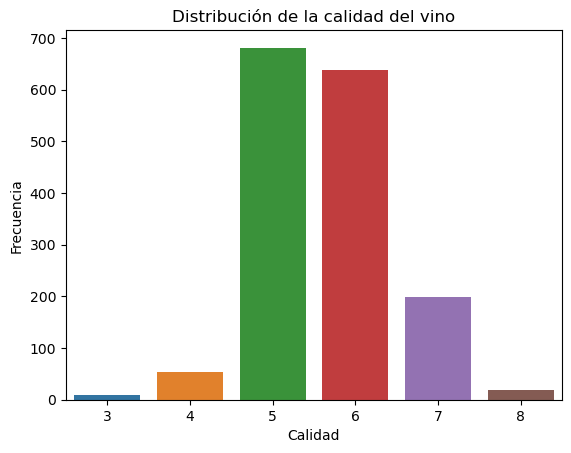

In [154]:
sns.countplot(x='quality', data=data)
plt.title('Distribución de la calidad del vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show() 

In [155]:
print(tabulate(data.isnull().sum().reset_index(), headers=['Columna', 'Datos Faltantes'], tablefmt='psql'))
features = data.drop('quality', axis=1)
target = data['quality'] 


+----+----------------------+-------------------+
|    | Columna              |   Datos Faltantes |
|----+----------------------+-------------------|
|  0 | fixed acidity        |                 0 |
|  1 | volatile acidity     |                 0 |
|  2 | citric acid          |                 0 |
|  3 | residual sugar       |                 0 |
|  4 | chlorides            |                 0 |
|  5 | free sulfur dioxide  |                 0 |
|  6 | total sulfur dioxide |                 0 |
|  7 | density              |                 0 |
|  8 | pH                   |                 0 |
|  9 | sulphates            |                 0 |
| 10 | alcohol              |                 0 |
| 11 | quality              |                 0 |
+----+----------------------+-------------------+


In [156]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)  


In [157]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)


In [158]:
model = DecisionTreeClassifier(random_state=42) 
model.fit(X_train, y_train)  


DecisionTreeClassifier(random_state=42)

In [159]:
y_pred = model.predict(X_test)

In [160]:
print(tabulate(confusion_matrix(y_test, y_pred), headers='keys', tablefmt='psql'))

+-----+-----+-----+-----+-----+-----+
|   0 |   1 |   2 |   3 |   4 |   5 |
|-----+-----+-----+-----+-----+-----|
|   0 |   0 |   0 |   1 |   0 |   0 |
|   0 |   1 |   4 |   5 |   0 |   0 |
|   1 |   3 |  88 |  36 |   2 |   0 |
|   0 |   4 |  39 |  70 |  17 |   2 |
|   0 |   1 |   5 |  14 |  21 |   1 |
|   0 |   0 |   1 |   3 |   1 |   0 |
+-----+-----+-----+-----+-----+-----+


In [161]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.11      0.10      0.11        10
           5       0.64      0.68      0.66       130
           6       0.54      0.53      0.54       132
           7       0.51      0.50      0.51        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.30      0.30      0.30       320
weighted avg       0.56      0.56      0.56       320



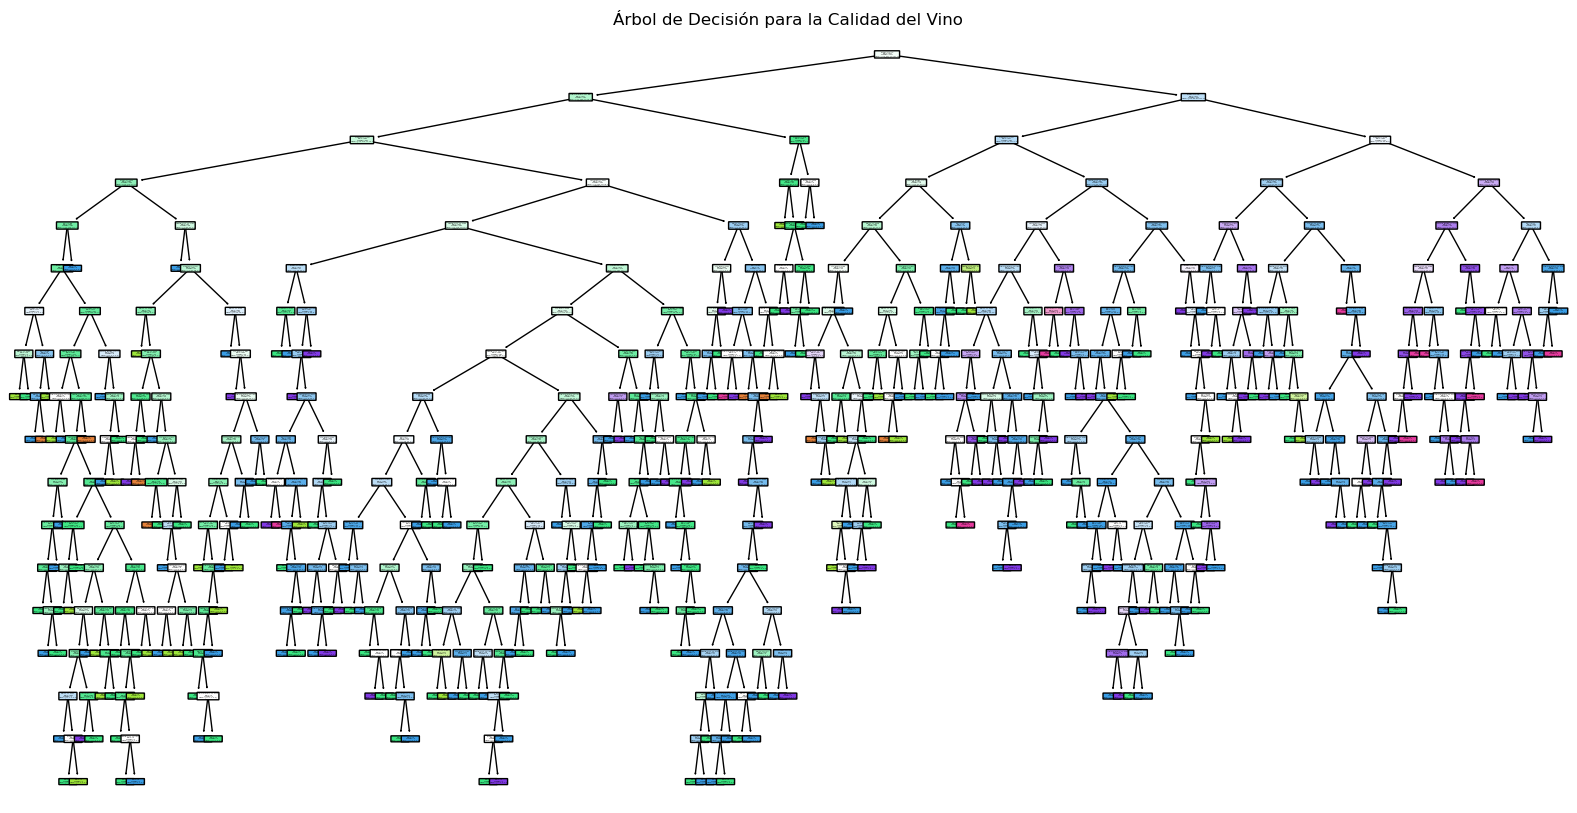

In [168]:
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=features.columns, class_names=list(map(str, target.unique())), rounded=True)
plt.title('Árbol de Decisión para la Calidad del Vino')
plt.show()  


In [163]:
y_pred_array = np.array(y_pred) 
y_test_array = np.array(y_test)
print("\nPredicciones y Valores Reales:")
if len(y_pred_array) == len(y_test_array):
    for i in range(len(y_pred_array)):
        print(f"Predicción: {y_pred_array[i]}, Valor Real: {y_test_array[i]}")
else:
    print("Error: Los arrays de predicciones y valores reales tienen diferentes longitudes.")


Predicciones y Valores Reales:
Predicción: 5, Valor Real: 6
Predicción: 6, Valor Real: 5
Predicción: 6, Valor Real: 6
Predicción: 4, Valor Real: 5
Predicción: 6, Valor Real: 6
Predicción: 5, Valor Real: 5
Predicción: 5, Valor Real: 5
Predicción: 5, Valor Real: 5
Predicción: 6, Valor Real: 5
Predicción: 6, Valor Real: 6
Predicción: 7, Valor Real: 7
Predicción: 6, Valor Real: 3
Predicción: 6, Valor Real: 5
Predicción: 5, Valor Real: 5
Predicción: 5, Valor Real: 6
Predicción: 6, Valor Real: 7
Predicción: 6, Valor Real: 5
Predicción: 6, Valor Real: 7
Predicción: 7, Valor Real: 8
Predicción: 5, Valor Real: 5
Predicción: 5, Valor Real: 5
Predicción: 6, Valor Real: 6
Predicción: 6, Valor Real: 5
Predicción: 6, Valor Real: 6
Predicción: 6, Valor Real: 6
Predicción: 6, Valor Real: 6
Predicción: 6, Valor Real: 7
Predicción: 6, Valor Real: 6
Predicción: 5, Valor Real: 5
Predicción: 6, Valor Real: 6
Predicción: 6, Valor Real: 5
Predicción: 6, Valor Real: 5
Predicción: 6, Valor Real: 6
Predicción:

In [164]:
print("\nMatriz de confusión:")
conf_matrix = confusion_matrix(y_test, y_pred) 
print(conf_matrix)


Matriz de confusión:
[[ 0  0  0  1  0  0]
 [ 0  1  4  5  0  0]
 [ 1  3 88 36  2  0]
 [ 0  4 39 70 17  2]
 [ 0  1  5 14 21  1]
 [ 0  0  1  3  1  0]]


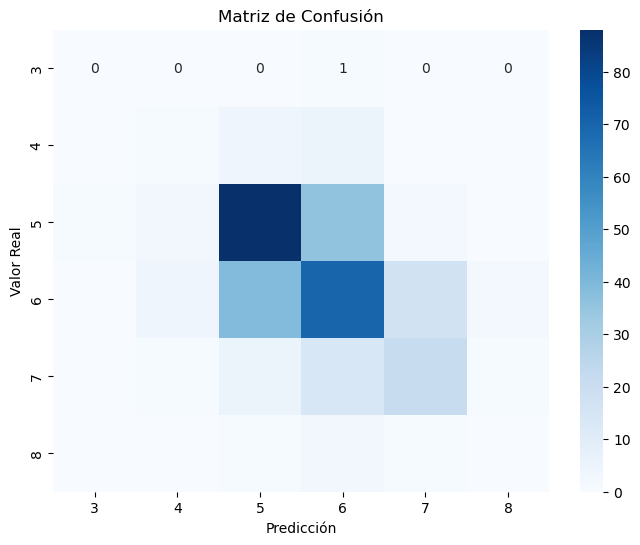

In [165]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(target), yticklabels=np.unique(target))
plt.ylabel('Valor Real')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

In [167]:
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))


Informe de clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.11      0.10      0.11        10
           5       0.64      0.68      0.66       130
           6       0.54      0.53      0.54       132
           7       0.51      0.50      0.51        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.30      0.30      0.30       320
weighted avg       0.56      0.56      0.56       320

